# Data Sceince Tools in Python

## What is data science?

In [1]:
import numpy as np
import pandas as pd

## 1. Intro to NumPy

### 1.1 Basics of NumPy array

<b>Data manipulation in Python is nearly synonymous with NumPy array manipulation</b>

<b>NumPy Array Attributes:</b>

In [2]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [3]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [4]:
print("dtype:", x3.dtype)

dtype: int64


In [5]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


In [6]:
print ("Full Array:",x1)
print ("0th element:",x1[0])
print (x1[4])
print (x1[-1])
print (x1[-2])

Full Array: [5 0 3 3 7 9]
0th element: 5
7
9
7


In [8]:
print (x2)
print (x2[0, 0])
print (x2[2, 0])
print (x2[2, -1])

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
3
1
7


In [9]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [10]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

### Array Slicing: Accessing Subarrays

<b>Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character.</b>

<b>x[start:stop:step]</b>

In [11]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
print (x[:5])  # first five elements
print (x[5:])  # elements after index 5
print (x[4:7]) # middle sub-array
print (x[::2]) # every other element
print (x[1::2])# every other element, starting at index 1

[0 1 2 3 4]
[5 6 7 8 9]
[4 5 6]
[0 2 4 6 8]
[1 3 5 7 9]


<b>Multi-dimensional</b>

In [13]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [14]:
print (x2[:2, :3]) # two rows, three columns
print (x2[:3, ::2])  #all rows, every other column
print (x2[::-1, ::-1])

[[12  5  2]
 [ 7  6  8]]
[[12  2]
 [ 7  8]
 [ 1  7]]
[[ 7  7  6  1]
 [ 8  8  6  7]
 [ 4  2  5 12]]


<b>Accessing array rows and columns</b>

In [15]:
print(x2[:, 0])  # first column of x2
print(x2[0, :])  # first row of x2
print(x2[0])  # equivalent to x2[0, :]

[12  7  1]
[12  5  2  4]
[12  5  2  4]


<b>Subarrays as no-copy views</b>

In [16]:
print(x2)
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]
[[12  5]
 [ 7  6]]


In [17]:
x2_sub[0, 0] = 99
print(x2_sub)
print(x2)

[[99  5]
 [ 7  6]]
[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


<b>Creating copies of arrays</b>

In [18]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [19]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [20]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


<b>Reshaping array:</b>

In [21]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


<b>Concatenation of arrays:</b>

In [22]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [23]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [24]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [25]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [26]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

<b>Splitting of array:</b>

In [27]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [29]:
x

[1, 2, 3, 99, 99, 3, 2, 1]

### Some Useful NumPy Function:

In [30]:
x = np.arange(4)
print (x)

[0 1 2 3]


In [31]:
np.add(x, 2)

array([2, 3, 4, 5])

<b>Operator	Equivalent ufunc	Description</b>
\+	`np.add`	Addition (e.g., 1 + 1 = 2)<br>
\-	`np.subtract`	Subtraction (e.g., 3 - 2 = 1)<br>
\-	`np.negative`	Unary negation (e.g., -2)<br>
\*	`np.multiply`	Multiplication (e.g., 2 * 3 = 6)<br>
/	`np.divide`	Division (e.g., 3 / 2 = 1.5)<br>
//	`np.floor_divide`	Floor division (e.g., 3 // 2 = 1)<br>
\**	`np.power`	Exponentiation (e.g., 2 ** 3 = 8)<br>
%	`np.mod`	Modulus/remainder (e.g., 9 % 4 = 1)<br>

In [32]:
x = np.array([-2, -1, 0, 1, 2])
np.abs(x)

array([2, 1, 0, 1, 2])

<b>Trigonometric functions:</b>

In [33]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


<b>Exponents and logarithms</b>

In [34]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [35]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Aggregations: Min, Max, and Everything In Between

In [36]:
L = np.random.random(100)
sum(L)

52.12818058833704

In [37]:
np.sum(L)

52.12818058833702

In [38]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

80.1 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
344 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
M = np.random.random((3, 4))
print(M)

[[0.50063048 0.07383653 0.49018646 0.72521956]
 [0.84926562 0.10226215 0.99559424 0.59250301]
 [0.53509    0.88518089 0.25518136 0.13130483]]


In [40]:
M.min(axis=0) #within each column

array([0.50063048, 0.07383653, 0.25518136, 0.13130483])

In [41]:
M.max(axis=1) #within each row

array([0.72521956, 0.99559424, 0.88518089])

<b>other aggregations:</b>

<b>Name	  NaN-safe Version	Description</b><br>
`np.sum`	`np.nansum`	Compute sum of elements<br>
`np.prod`	`np.nanprod`	Compute product of elements<br>
`np.mean`	`np.nanmean`	Compute mean of elements<br>
`np.std`	`np.nanstd`	Compute standard deviation<br>
`np.var`	`np.nanvar`	Compute variance<br>
`np.min`	`np.nanmin`	Find minimum value<br>
`np.max`	`np.nanmax`	Find maximum value<br>
`np.argmin`	`np.nanargmin`	Find index of minimum value<br>
`np.argmax`	`np.nanargmax`	Find index of maximum value<br>
`np.median`	`np.nanmedian`	Compute median of elements<br>
`np.percentile`	`np.nanpercentile`	Compute rank-based statistics of elements<br>
`np.any`	`N/A`	Evaluate whether any elements are true<br>
`np.all`	`N/A`	Evaluate whether all elements are true<br>

### Comparisons, Masks, and Boolean Logic:

In [42]:
x = np.array([1, 2, 3, 4, 5])
print (x)
print (x < 3) # less than
print (x > 3) # greater than
print (x <= 3)# less than or equal

[1 2 3 4 5]
[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]


In [43]:
np.less(x, 3)

array([ True,  True, False, False, False])

`==`	`np.equal`		<br>
`!=`	`np.not_equal`<br>
`<`	`np.less`		<br>
`<=`	`np.less_equal`<br>
`>`	`np.greater`		<br>
`>=`	`np.greater_equal`<br>

In [44]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [45]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

<b>Working with Boolean Arrays:</b>

In [46]:
print(x)
# how many values less than 6?
#To count the number of True entries in a Boolean array, np.count_nonzero is useful:
np.count_nonzero(x < 6)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


8

In [47]:
# Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:
np.sum(x < 6)

8

In [48]:
# how many values less than 6 in each row?
#The benefit of sum() is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [49]:
#f we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) np.any or np.all:
np.any(x > 8)
np.any(x < 0)

False

### Sorting Arrays

<b>Fast Sorting in NumPy: np.sort and np.argsort:</b>

In [50]:
#To return a sorted version of the array without modifying the input, you can use np.sort:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [51]:
#If you prefer to sort the array in-place, you can instead use the sort method of arrays:
x.sort()
print(x)

[1 2 3 4 5]


In [52]:
#A related function is argsort, which instead returns the indices of the sorted elements:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


<b>Sorting along rows or columns:</b>

In [53]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [54]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [55]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

<b>Partial Sorts: Partitioning:</b>

Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [56]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [58]:
import numpy as np
import pandas as pd

## 2. Intro to Pandas

### 2.1 Pandas objects

<b>We'll be looking at two main objects of the Pandas library namely, Series and DataFrames.</b>

#### 2.1.1 Series
A series object is one-dimensional array/list of values that are indexed. Think of it like an indexed 'series' of values. 
<br>Let's look at some examples:

In [59]:
# List -> Series
numbers = pd.Series([1, 2, 3.4, 5.67, 8, 0.9])

names = pd.Series(['Alane', 'Ayanna', 'Tyisha', 'Jarvis', 'Tabetha', 'Geoffrey', 'Ken'])

print(numbers, '\n')
print(names)

0    1.00
1    2.00
2    3.40
3    5.67
4    8.00
5    0.90
dtype: float64 

0       Alane
1      Ayanna
2      Tyisha
3      Jarvis
4     Tabetha
5    Geoffrey
6         Ken
dtype: object


As you can see a default index is added to the list of values. Lets add a <b>custom index</b>.

In [60]:
custom_index = 'abcdef'

# Please note how we use the attribute 'values' for a series object
numbers2 = pd.Series(numbers.values, index=list(custom_index))

numbers2

a    1.00
b    2.00
c    3.40
d    5.67
e    8.00
f    0.90
dtype: float64

Let's look at the values in the series objects we've created, using indexes.

In [62]:
print('The second value in series numbers is: ', numbers[1], '\n')

print('The second value in series numbers2 is: ', numbers2['b'])

The second value in series numbers is:  2.0 

The second value in series numbers2 is:  2.0


Another way to address it using indices can be the following:

In [63]:
print('The first three values in series numbers2 are:')

print(numbers2[:'c']) # numbers2['a':'c'] or numbers2[:3] or numbers2[1:3] or numbers2[:-3] work the same

The first three values in series numbers2 are:
a    1.0
b    2.0
c    3.4
dtype: float64


Let's look at another way that we can create a series object: <b>Dictionaries</b>

In [64]:
locations_dict = {0:'California', 1:'New York', 2:'Virginia', 3:'Michigan', 4:'Texas', 5:'Nevada', 6:'Illinois'}

locations = pd.Series(locations_dict)

locations

0    California
1      New York
2      Virginia
3      Michigan
4         Texas
5        Nevada
6      Illinois
dtype: object

#### 2.1.2 Data Frames
Pandas DataFrame object is generally a two-dimensional, size mutable, potentially heterogeneous tabular data with axes that are labeled. It can be considered to be a special form of a Python dictionary or a numpy array.
<br>Let's look at some examples:

In [66]:
# one of the most common ways to create a data frame
age = {0:5, 1:21, 2:12, 3:10, 4:30, 5:13, 6:70}

data1 = pd.DataFrame({'Name': names, 'Age': age, 'Location': locations})

data1

,Name,Age,Location
0,Alane,5,California
1,Ayanna,21,New York
2,Tyisha,12,Virginia
3,Jarvis,10,Michigan
4,Tabetha,30,Texas
5,Geoffrey,13,Nevada
6,Ken,70,Illinois


Let's play with the index a little (both the column and row index) while introducing a new way to create a data frame with pandas (using an existing data frame).

In [67]:
data2 = pd.DataFrame(data=data1).set_index('Name', drop=True)

data2

,Age,Location
Name,,
Alane,5,California
Ayanna,21,New York
Tyisha,12,Virginia
Jarvis,10,Michigan
Tabetha,30,Texas
Geoffrey,13,Nevada
Ken,70,Illinois


Let's create a data frame using <b>numpy arrays</b>.

In [68]:
data3 = pd.DataFrame(np.arange(12).reshape(6, 2), columns=['Even', 'Odd'], index=list(custom_index))

data3

,Even,Odd
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9
f,10,11


### 2.2 Selection and Indexing of Data in Pandas

Let's look at a couple of ways we access the columns of a data frame in pandas.
<br><b>Note</b>: For this section, we'll use the '<b>data2</b>' data frame created earlier.

In [70]:
data2['Age']

Name
Alane        5
Ayanna      21
Tyisha      12
Jarvis      10
Tabetha     30
Geoffrey    13
Ken         70
Name: Age, dtype: int64

In [71]:
data2.Age

Name
Alane        5
Ayanna      21
Tyisha      12
Jarvis      10
Tabetha     30
Geoffrey    13
Ken         70
Name: Age, dtype: int64

In [72]:
data2.Age is data2['Age']

True

In [73]:
data2[['Age', 'Location']]

,Age,Location
Name,,
Alane,5,California
Ayanna,21,New York
Tyisha,12,Virginia
Jarvis,10,Michigan
Tabetha,30,Texas
Geoffrey,13,Nevada
Ken,70,Illinois


Both the above usages give the same result.

Now, we'll use this to operate on our data. We'll see how we can create a new column and enter values in that column by operating on an existing column.
<br><br>Let's say that the 'Age' information in the dataset is 10 years old and we need to add a new column that has the adjusted values. Following is how we can accomplish that:

In [74]:
data2['Age_current'] = data2['Age'] + 10

data2

,Age,Location,Age_current
Name,,,
Alane,5,California,15
Ayanna,21,New York,31
Tyisha,12,Virginia,22
Jarvis,10,Michigan,20
Tabetha,30,Texas,40
Geoffrey,13,Nevada,23
Ken,70,Illinois,80


We can also use same sized multiple series of data to perform similar operations.

Now we'll look at some attributes that can be used by a pandas DataFrame object.

In [75]:
# columns
data2.columns

Index(['Age', 'Location', 'Age_current'], dtype='object')

In [76]:
# index
data2.index

Index(['Alane', 'Ayanna', 'Tyisha', 'Jarvis', 'Tabetha', 'Geoffrey', 'Ken'], dtype='object', name='Name')

In [77]:
# values
data2.values

array([[5, 'California', 15],
       [21, 'New York', 31],
       [12, 'Virginia', 22],
       [10, 'Michigan', 20],
       [30, 'Texas', 40],
       [13, 'Nevada', 23],
       [70, 'Illinois', 80]], dtype=object)

In [79]:
# indexing the values
data2.values[1]

array([21, 'New York', 31], dtype=object)

Now, let's look at a bit more sophisticated methods for indexing.
<br>We'll use the following:
1. <b>iloc</b>: simple array like implicit integer indexer
2. <b>loc</b>: uses explict index and column names

In [80]:
# first two columns and all rows except the first
data2.iloc[1:, :2]

,Age,Location
Name,,
Ayanna,21,New York
Tyisha,12,Virginia
Jarvis,10,Michigan
Tabetha,30,Texas
Geoffrey,13,Nevada
Ken,70,Illinois


In [81]:
# first two columns and all rows except the first
data2.loc['Tyisha':, :'Location']

,Age,Location
Name,,
Tyisha,12,Virginia
Jarvis,10,Michigan
Tabetha,30,Texas
Geoffrey,13,Nevada
Ken,70,Illinois


Let's use what we've learned in this section to apply a mask to our data and output only selected columns like we would do using an SQL query.

In [83]:
data2.Age_current > 25

Name
Alane       False
Ayanna       True
Tyisha      False
Jarvis      False
Tabetha      True
Geoffrey    False
Ken          True
Name: Age_current, dtype: bool

In [82]:
data2.loc[data2.Age_current > 25, ['Age_current', 'Location']]

,Age_current,Location
Name,,
Ayanna,31,New York
Tabetha,40,Texas
Ken,80,Illinois


### 2.3 Handling missing values in Pandas

Pandas uses two types of sentinels for representing null values and those are <b>None</b> and <b>NaN</b>.
1. A <b>None</b> value is a python object generally used for representing null values in numpy arrays.
2. A <b>NaN</b> value is a floating point value. When operating on data with 'NaN' values the operations tend to give out unwanted results.
<br>We'll look at both in the following cells:

In [85]:
missing1 = np.array([1, 2, 3, None])
missing1

array([1, 2, 3, None], dtype=object)

In [87]:
missing2 = np.array([1, 2, 3, np.nan])
missing2
# missing2.dtype

array([ 1.,  2.,  3., nan])

In [88]:
# operating a value with NaN will result in NaN
print('Addition: (0 + {}) = {}'.format(np.nan, (0+np.nan)))
print('Multiplication: (1 * {}) = {}'.format(np.nan, (1*np.nan)))

Addition: (0 + nan) = nan
Multiplication: (1 * nan) = nan


<br>In Pandas, 'None' values are interchanged into 'NaN' values due to type casting as and when required. Let's look at an example:

In [90]:
# example = pd.Series([1, 2, 3])
example = pd.Series([1, 2, np.nan, 3, None])
example

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64

<br>Now we'll se how we can operate on null values in pandas. Following are some functions we'll be looking at:
1. isnull( )
2. notnull( )
3. fillna( )
4. dropna( )

In [92]:
example

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64

In [93]:
# isnull returns a boolean mask for the data
example.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [94]:
# notnull also returns a boolean mask for the data but it's opposite to isnull
example.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [96]:
# use either of those masks to access the data
example[example.notnull()]

0    1.0
1    2.0
3    3.0
dtype: float64

Now we'll use the pandas data frame to see how the functions <b>fillna( )</b> and <b>dropna( )</b> work.

In [97]:
missing3 = data1.copy()
missing3.loc[3:5, 'Age'] = np.nan
missing3

,Name,Age,Location
0,Alane,5.0,California
1,Ayanna,21.0,New York
2,Tyisha,12.0,Virginia
3,Jarvis,NaN,Michigan
4,Tabetha,NaN,Texas
5,Geoffrey,NaN,Nevada
6,Ken,70.0,Illinois


In [98]:
# dropping rows with null values
missing3.dropna(inplace=False)

,Name,Age,Location
0,Alane,5.0,California
1,Ayanna,21.0,New York
2,Tyisha,12.0,Virginia
6,Ken,70.0,Illinois


In [100]:
# let's fill these values with the average of the non-null values.
missing3.fillna(missing3.dropna()['Age'].mean(), inplace=True)
missing3

,Name,Age,Location
0,Alane,5.0,California
1,Ayanna,21.0,New York
2,Tyisha,12.0,Virginia
3,Jarvis,27.0,Michigan
4,Tabetha,27.0,Texas
5,Geoffrey,27.0,Nevada
6,Ken,70.0,Illinois


### 2.4 Combining Datasets

#### 2.4.1 concat( ) and append( )
First we'll look at some simple functions that are used to combine datasets, <b>concat( ) and append( )</b>.
<br>Let's look at pd.concat( ) first. 
<br><b>Note</b>: We'll use data frames for our examples, but series can be used just the same.

In [101]:
# create two new data frames
sample1 = pd.DataFrame(data={'A':[1, 2], 'B':[3, 4]}, index=[0, 1])
sample2 = pd.DataFrame(data={'A':[5, 6], 'B':[7, 8]}, index=[0, 1])
display('sample1', sample1, 'sample2', sample2)

'sample1'

,A,B
0,1,3
1,2,4


'sample2'

,A,B
0,5,7
1,6,8


In [103]:
# now we'll see 2 ways of concatinating them

# row-wise concatenation
sample3 = pd.concat([sample1, sample2], axis=0)

# column-wise concatenation
sample4 = pd.concat([sample1, sample2], axis=1)

display('sample3',sample3, 'sample4', sample4)

'sample3'

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


'sample4'

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


An important parameter for this function is '<b>join</b>'. Let's look at an example:

In [104]:
# create two new dataframes
sample5 = sample1.copy()
sample6 = pd.DataFrame(data={'B':[9, 10], 'C':[11, 12]}, index=[0, 1])

display('sample5', sample5, 'sample6', sample6)

'sample5'

,A,B
0,1,3
1,2,4


'sample6'

,B,C
0,9,11
1,10,12


In [105]:
# join these data frames over B using pd.concat()
display('Joined', pd.concat([sample5, sample6], join='inner'))

'Joined'

,B
0,3
1,4
0,9
1,10


Now, we'll look at <b>append( )</b> function. Though it gives a simmilar result as <b>concat( )</b> gives, but is a bit limited in its implementation as it only 'appends' row-wise.

In [107]:
display('append', sample1.append(sample2))

'append'

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


#### 2.4.2 Merge and Join
Now we'll look at some of the more sophisticated methods for combining datasets.
<br>First we'll see how to 'merge' datasets. We'll do that using <b>pd.merge( )</b>.

In [108]:
left = pd.DataFrame({'A': [1, 2], 'B': [2, 3]})
right = pd.DataFrame({'A': [4, 5, 6], 'B': [2, 2, 2]})

display('left', left, 'right', right)

'left'

,A,B
0,1,2
1,2,3


'right'

,A,B
0,4,2
1,5,2
2,6,2


In [109]:
# outer join over column 'B'
merger = pd.merge(left, right, on='B', how='outer', indicator=True)
merger

,A_x,B,A_y,_merge
0,1,2,4.0,both
1,1,2,5.0,both
2,1,2,6.0,both
3,2,3,NaN,left_only


In addition to columns, we can also merge on index.

In [110]:
# create new data frames
df1 = pd.DataFrame({'Age':list(age.values())}, index=names)
df2 = pd.DataFrame({'Dept_ID':[1, 2, 3, 4, 1, 3, 1]}, index=names)
display('df1', df1, 'df2', df2)

'df1'

,Age
Alane,5
Ayanna,21
Tyisha,12
Jarvis,10
Tabetha,30
Geoffrey,13
Ken,70


'df2'

,Dept_ID
Alane,1
Ayanna,2
Tyisha,3
Jarvis,4
Tabetha,1
Geoffrey,3
Ken,1


In [111]:
# let's use index to merge
pd.merge(df1, df2, left_index=True, right_index=True)

,Age,Dept_ID
Alane,5,1
Ayanna,21,2
Tyisha,12,3
Jarvis,10,4
Tabetha,30,1
Geoffrey,13,3
Ken,70,1


The <b>join( )</b> function does the same thing as it primarily works on index.

In [112]:
df3 = df1.join(df2)
df3

,Age,Dept_ID
Alane,5,1
Ayanna,21,2
Tyisha,12,3
Jarvis,10,4
Tabetha,30,1
Geoffrey,13,3
Ken,70,1


Now let's look at how we would merge data frames with different sizes and columns.

In [113]:
# data frame for department 
df4 = pd.DataFrame({'Department_ID':[1, 2, 3, 4, 5], 'Department':['CSE', 'FRE', 'ECE', 'DS', 'BIO']})
df4

,Department_ID,Department
0,1,CSE
1,2,FRE
2,3,ECE
3,4,DS
4,5,BIO


This data frame is strictly dedicated to the information about a department. 'DepartmentID' is the identifying column (primary key) in this case while it's also present in 'df3' as 'DeptID' (as the foreign key) which has the information about person name and their age. Now we'll see ways to combine these datasets.
<br>As the names of the department ID columns are different in both dataframes, instead of just using the 'on' parameter as earlier, we'll have to specify columns from both of them data frames on which to join/merge.

In [114]:
# inner join
pd.merge(df3, df4, left_on='Dept_ID', right_on='Department_ID', how='inner')

,Age,Dept_ID,Department_ID,Department
0,5,1,1,CSE
1,30,1,1,CSE
2,70,1,1,CSE
3,21,2,2,FRE
4,12,3,3,ECE
5,13,3,3,ECE
6,10,4,4,DS


In [115]:
# outer join
pd.merge(df4, df3, left_on='Department_ID', right_on='Dept_ID', how='outer', indicator=True)

,Department_ID,Department,Age,Dept_ID,_merge
0,1,CSE,5.0,1.0,both
1,1,CSE,30.0,1.0,both
2,1,CSE,70.0,1.0,both
3,2,FRE,21.0,2.0,both
4,3,ECE,12.0,3.0,both
5,3,ECE,13.0,3.0,both
6,4,DS,10.0,4.0,both
7,5,BIO,NaN,NaN,left_only


### 2.5 Grouping and Aggregation

In this section we'll see how we can leverage the properties of a data frame and perform certain groupings and aggregations to better understand the data. Let's look at some examples.

In [116]:
# new series for number of hours worked
hours = pd.Series([30, 21, 40, 40, 35, 50, 15])
hours

0    30
1    21
2    40
3    40
4    35
5    50
6    15
dtype: int64

In [117]:
# simple aggregations on series
print('Hours sum:', hours.sum())
print('Hours mean', hours.mean())

Hours sum: 231
Hours mean 33.0


In [119]:
# add hours to df1
df1['Hrs_Worked/week'] = hours.values
df1

,Age,Hrs_Worked/week
Alane,5,30
Ayanna,21,21
Tyisha,12,40
Jarvis,10,40
Tabetha,30,35
Geoffrey,13,50
Ken,70,15


In [120]:
# calculate mean column-wise
df1.mean()

Age                23.0
Hrs_Worked/week    33.0
dtype: float64

In [121]:
# calculate mean row-wise
df1.mean(axis='columns')

Alane       17.5
Ayanna      21.0
Tyisha      26.0
Jarvis      25.0
Tabetha     32.5
Geoffrey    31.5
Ken         42.5
dtype: float64

Let's look at the <b>describe( )</b> function that is usually used to look at these aggregations in a data frame.

In [122]:
# describe()
df1.describe()

,Age,Hrs_Worked/week
count,7.000000,7.000000
mean,23.000000,33.000000
std,22.271057,12.027746
min,5.000000,15.000000
25%,11.000000,25.500000
50%,13.000000,35.000000
75%,25.500000,40.000000
max,70.000000,50.000000


Now, we'll look at how to group the data and perform operations. This is one of the most important and widely used transformation on data frames.
<br>The function we'll use here is <b>groupby( )</b>.

In [123]:
# new data frame with Dept_ID
df5 = df1.join(df2).reset_index().rename(columns={'index':'Name'})
df5

,Name,Age,Hrs_Worked/week,Dept_ID
0,Alane,5,30,1
1,Ayanna,21,21,2
2,Tyisha,12,40,3
3,Jarvis,10,40,4
4,Tabetha,30,35,1
5,Geoffrey,13,50,3
6,Ken,70,15,1


Aggregations on <b>groupby( )</b>.

In [124]:
# display names of people with maximum age in each department
df5.groupby('Dept_ID')['Name', 'Age'].max()

,Name,Age
Dept_ID,,
1,Tabetha,70
2,Ayanna,21
3,Tyisha,13
4,Jarvis,10


Filtering on <b>groupby( )</b>.

In [125]:
# display departments with minimum age greater than 10
df5.groupby('Dept_ID').filter(lambda x: x['Age'].min()>10)

,Name,Age,Hrs_Worked/week,Dept_ID
1,Ayanna,21,21,2
2,Tyisha,12,40,3
5,Geoffrey,13,50,3


Applying functions over dataframe after <b>groupby( )</b>.

In [126]:
# normalize hours worked per week for each department
def func_normalize(x):
    x['Hrs_Worked/week'] = x['Hrs_Worked/week']/(x['Hrs_Worked/week'].sum())
    return x
    
df5.groupby('Dept_ID').apply(func_normalize)

,Name,Age,Hrs_Worked/week,Dept_ID
0,Alane,5,0.375000,1
1,Ayanna,21,1.000000,2
2,Tyisha,12,0.444444,3
3,Jarvis,10,1.000000,4
4,Tabetha,30,0.437500,1
5,Geoffrey,13,0.555556,3
6,Ken,70,0.187500,1


### 2.6 Importing data in Pandas

Here we'll look at one of the most common file formats used i.e. CSV.
<br>There are many more formats supported by pandas. For the purpose of this exercise, we'll only look at importing CSV files.

In [127]:
# get US states data 
population = pd.read_csv('data-USstates/state-population.csv')
area = pd.read_csv('data-USstates/state-areas.csv')
abbrev = pd.read_csv('data-USstates/state-abbrevs.csv')

In [128]:
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [129]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [132]:
abbrev.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Let's apply what we learned above and merge these three files.

In [133]:
df6 = pd.merge(area, abbrev, on='state')
df6.head()

,state,area (sq. mi),abbreviation
0,Alabama,52423,AL
1,Alaska,656425,AK
2,Arizona,114006,AZ
3,Arkansas,53182,AR
4,California,163707,CA


In [134]:
df7 = pd.merge(population, df6, left_on='state/region', right_on='abbreviation', how='outer').drop('abbreviation', axis=1)
df7.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [135]:
df7.describe()

,year,population,area (sq. mi)
count,2544.000000,2.524000e+03,2448.000000
mean,2001.500000,6.805558e+06,74252.627451
std,6.923547,2.855014e+07,94929.655186
min,1990.000000,1.013090e+05,68.000000
25%,1995.750000,7.423805e+05,35387.000000
50%,2001.500000,1.597005e+06,56276.000000
75%,2007.250000,4.547104e+06,84904.000000
max,2013.000000,3.161288e+08,656425.000000


In [136]:
# finally lets apply a grouping to this data
df7.groupby(['state/region', 'ages', 'year'])[df7.columns].filter(
    lambda x: x['population'].min()>3000000 and x['area (sq. mi)'].min()>50000
)

,state/region,ages,year,population,state,area (sq. mi)
1,AL,total,2012,4817528.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
5,AL,total,2011,4801627.0,Alabama,52423.0
6,AL,total,2009,4757938.0,Alabama,52423.0
9,AL,total,2013,4833722.0,Alabama,52423.0
10,AL,total,2007,4672840.0,Alabama,52423.0
12,AL,total,2008,4718206.0,Alabama,52423.0
14,AL,total,2005,4569805.0,Alabama,52423.0
16,AL,total,2006,4628981.0,Alabama,52423.0
18,AL,total,2004,4530729.0,Alabama,52423.0


## 3. Intro to Matplotlib

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

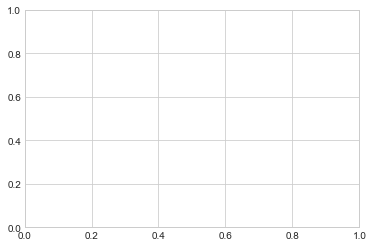

In [138]:
#For all Matplotlib plots, we start by creating a figure and an axes.
fig = plt.figure()
ax = plt.axes()

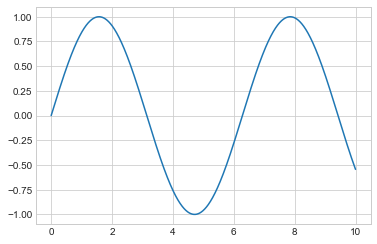

In [139]:
fig = plt.figure()
ax = plt.axes()
#Start point is 0 and end point is 10 number of samples is 1000
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [ ]:
x

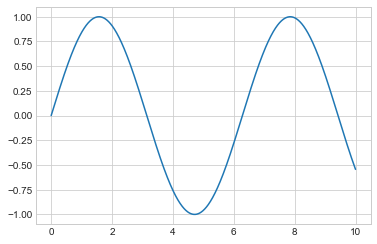

In [140]:
#can also be done like this
plt.plot(x, np.sin(x));

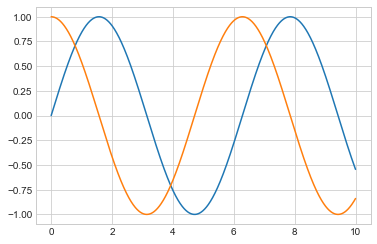

In [141]:
#Compare sin and cos
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

<b>Adjusting the Plot: Line Colors and Styles:</b>

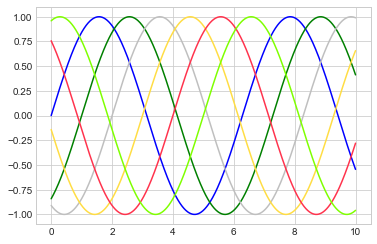

In [142]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

<b>adjusting line style:</b>

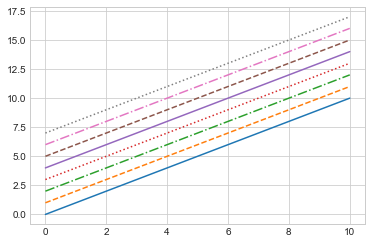

In [143]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

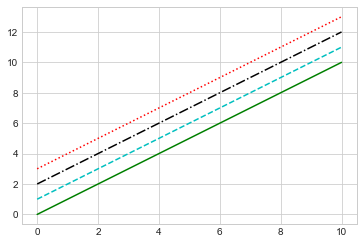

In [144]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

<b>Labeling Plots:</b>

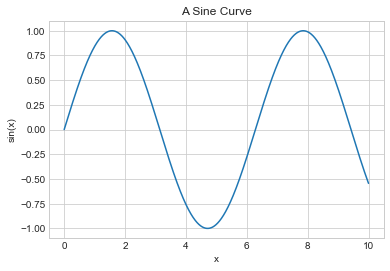

In [145]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

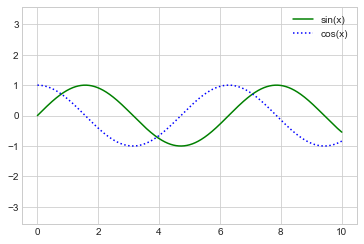

In [146]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

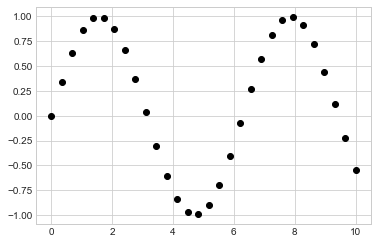

In [147]:
#In the previous section we looked at plt.plot/ax.plot to produce line plots. 
#It turns out that this same function can produce scatter plots as well:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

#The third argument in the function call is a character that represents the type of symbol used for the plotting. 
#Just as you can specify options such as '-', '--'


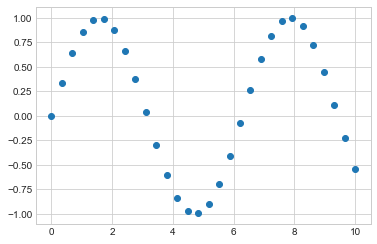

In [148]:
#A second, more powerful method of creating scatter plots is the plt.scatter
plt.scatter(x, y, marker='o');

Now, let's use the US states data we imported earlier to create some visualizations in matplotlib.

Text(0, 0.5, 'State')

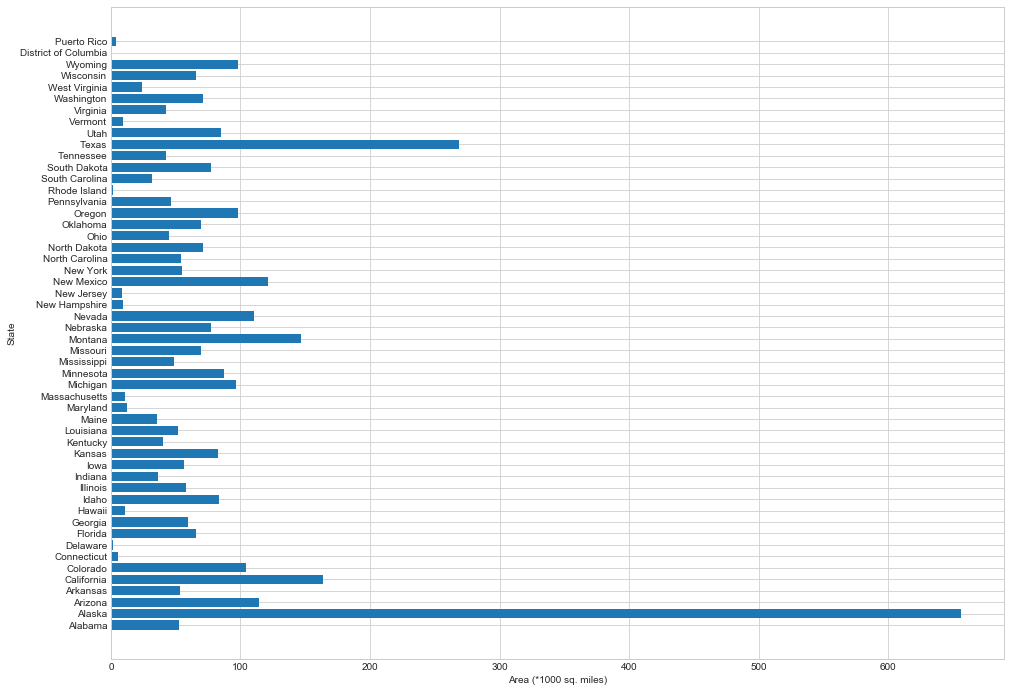

In [149]:
fig1, a= plt.subplots(1, 1, figsize=(16, 12))
a.barh(area['state'], width=area['area (sq. mi)']/1000)
a.set_xlabel('Area (*1000 sq. miles)')
a.set_ylabel('State')